# IMDB - Embedding with DNN
> ## NLP(Natural Language Processing)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Import Tensorflow

In [ ]:
import tensorflow

tensorflow.__version__

'2.9.2'

# I. IMDB Data_Set Load & Review

> ## 1) Load IMDB Data_Set

In [ ]:
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 2s 0us/step


> ## 2) Original Data Shape

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


> ## 3) Data Length & Frequency

> ### (1) X_train - 리뷰 길이

In [ ]:
import matplotlib.pyplot as plt

print('리뷰 최대 길이 :', max(len(L) for L in X_train))
print('리뷰 평균 길이 :', sum(map(len, X_train))/len(X_train))

리뷰 최대 길이 : 2494
리뷰 평균 길이 : 238.71364


> ### (2) y_train - Frequency(0:부정, 1:긍정)

In [ ]:
import numpy as np

unique_elements, counts_elements = np.unique(y_train, return_counts = True)

print('Label 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

Label 빈도수:
[[    0     1]
 [12500 12500]]


# II. Tensor Transformation

> ## 1) X_train & X_test : (25000, 2500)

* .pad_sequences( )
 - (25000, 2500)
   - padding = 'pre': 문장의 길이를 2500으로 변경하고 앞쪽에 '0'으로 채우기
   - padding = 'post': 문장의 길이를 2500으로 변경하고 뒤쪽에 '0'으로 채우기

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, 
                        maxlen = 2500, 
                        padding = 'post')
X_test = pad_sequences(X_test, 
                       maxlen = 2500, 
                       padding = 'post')

X_train.shape, X_test.shape

((25000, 2500), (25000, 2500))

* Transformation Check

In [ ]:
print(X_train[0][:21])
print(X_train[0][-20:])
print()
print(X_test[0][:21])
print(X_test[0][-20:])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

[   1  591  202   14   31    6  717   10   10    2    2    5    4  360
    7    4  177 5760  394  354    4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


> ## 2) y_train & y_test

In [ ]:
y_train = np.asarray(y_train).astype(float)
y_test = np.asarray(y_test).astype(float)

print(y_train[:21])
print()
print(y_test[:21])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]

[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# III. Keras Embedding Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - Embedding Dimension : 32
   - Input_dim: 적용 단어 종류
   - output_dim: 임베딩 차원
   - input_length: 입력 데이터 최대 길이

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

imdb = models.Sequential()
imdb.add(layers.Embedding(input_dim = 10000, 
                          output_dim = 32, 
                          input_length = 2500))

imdb.add(layers.Flatten())
imdb.add(layers.Dense(16))

imdb.add(layers.Dense(1, activation = 'sigmoid'))

* 모델 구조 확인

In [ ]:
imdb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2500, 32)          320000    
                                                                 
 flatten (Flatten)           (None, 80000)             0         
                                                                 
 dense (Dense)               (None, 16)                1280016   
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,600,033
Trainable params: 1,600,033
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [ ]:
imdb.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

> ## 3) Model Fit

In [ ]:
%%time

Hist_imdb = imdb.fit(X_train, y_train,
                     epochs = 25,
                     batch_size = 512,
                     validation_data = (X_test, y_test))

Epoch 1/25
49/49 [==============================] - 4s 28ms/step - loss: 1.5332 - accuracy: 0.5094 - val_loss: 0.6590 - val_accuracy: 0.5473
Epoch 2/25
49/49 [==============================] - 1s 22ms/step - loss: 0.4663 - accuracy: 0.8095 - val_loss: 0.3994 - val_accuracy: 0.8230
Epoch 3/25
49/49 [==============================] - 1s 23ms/step - loss: 0.2555 - accuracy: 0.9084 - val_loss: 0.3085 - val_accuracy: 0.8715
Epoch 4/25
49/49 [==============================] - 1s 22ms/step - loss: 0.1669 - accuracy: 0.9424 - val_loss: 0.3976 - val_accuracy: 0.8371
Epoch 5/25
49/49 [==============================] - 1s 22ms/step - loss: 0.1150 - accuracy: 0.9642 - val_loss: 0.3701 - val_accuracy: 0.8505
Epoch 6/25
49/49 [==============================] - 1s 22ms/step - loss: 0.0824 - accuracy: 0.9766 - val_loss: 0.3479 - val_accuracy: 0.8669
Epoch 7/25
49/49 [==============================] - 1s 23ms/step - loss: 0.0341 - accuracy: 0.9938 - val_loss: 0.3795 - val_accuracy: 0.8646
Epoch 8/25
49

> ## 4) 학습 결과 시각화

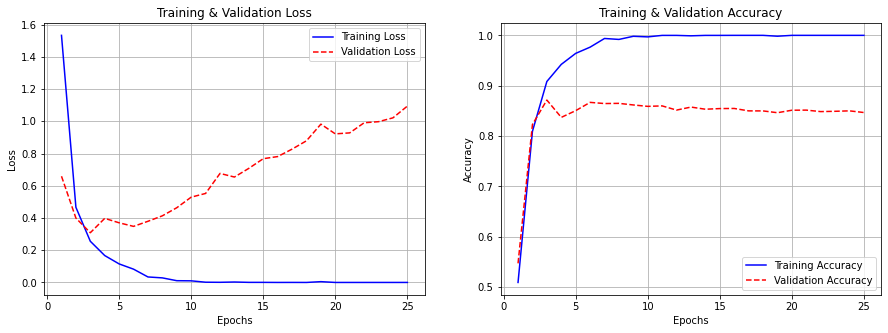

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_imdb.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_imdb.history['loss'], 'b-')
plt.plot(epochs, Hist_imdb.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_imdb.history['accuracy'], 'b-')
plt.plot(epochs, Hist_imdb.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = imdb.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 1.09421
Accuracy = 0.84676


# 
# 
# 
# The End
# 
# 
# 